<div class="alert alert-block alert-info">  

# AIRLINE CUSTOMER SEGMENTATION
    
</div>

## **CHAPTER I. BUSINESS UNDERSTANDING**

<div align='justify'>
Manajemen hubungan dengan pelanggan adalah inti bisnis perusahaan. Kunci manajemen pelanggan adalah segmentasi pelanggan. Berdasarkan segmentasi pelanggan perusahaan dapat membedakan antara pelanggan yang tidak bernilai dengan pelanggan yang bernilai tinggi. Dengan mengetahui hal tersebut perusahaan kemudian dapat merumuskan rencana pelayanan yang dipersonalisasi untuk masing-masing pelanggan, melakukan strategi pemasaran yang berbeda dan memfokuskan sumber daya perusahaan yang terbatas pada pelanggan yang bernilai tinggi sehingga dapat memaksimalkan keuntungan perusahaan. 
<div>
<br/>   
<div align='justify'>
Segmentasi traditional biasa dilakukan dengan melihat nilai rata-rata dari suatu variabel kemudian membagi pelanggan menjadi pelanggan yang memiliki nilai lebih dari rata-rata dan di bawah rata-rata, pembagian tersebut kurang efektif dan terkadang menyebabkan terlalu banyak kelompok pelanggan yang terbagi sehingga meningkatkan biaya pemasaran yang ditargetkan. Oleh karena itu, metode clustering K-Means digunakan untuk mengidentifikasi nilai pelanggan sehingga pelanggan yang paling berharga dapat diidentifikasi.

## **CHAPTER II. PREPARATION**

### **2.1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:2f}'.format
pd.set_option('display.max_columns',None)

### **2.2. Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Homework Unsurpervised Learning/flight.csv')

In [ ]:
df.sample(7)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
27056,44828,12/6/2008,12/6/2008,Male,4,changchun,jilin,CN,37.000000,3/31/2014,7,7049,816.000000,3012.000000,11225,1/25/2014,67,89.500000,182,0,0.767861,7049,0
41509,49626,5/7/2012,5/7/2012,Female,4,shamen,fujian,CN,31.000000,3/31/2014,3,2945,3433.000000,0.000000,6560,12/25/2012,463,116.000000,193,0,0.658491,2945,0
59819,46623,7/18/2011,2/5/2014,Male,6,shantou,guangdong,CN,46.000000,3/31/2014,2,919,0.000000,1323.000000,1756,2/11/2014,50,6.000000,6,0,0.735000,1313,4
49958,56358,8/16/2005,9/20/2005,Male,4,NaN,NaN,SG,61.000000,3/31/2014,3,2008,1913.000000,0.000000,5438,3/15/2013,383,1.500000,3,1,0.507576,2008,1
2921,38315,10/21/2005,8/20/2009,Male,6,guangzhou,guangdong,CN,59.000000,3/31/2014,25,44126,24795.000000,18243.000000,30596,3/19/2014,13,29.500000,95,0,1.451671,47128,3
14318,10257,5/1/2008,5/1/2008,Female,4,guangzhou,guangdong,CN,64.000000,3/31/2014,16,11304,5686.000000,8060.000000,25228,3/20/2014,12,38.800000,122,0,0.656605,11304,0
36060,12405,6/19/2008,6/26/2008,Male,4,shanghai,shanghai,CN,41.000000,3/31/2014,4,5282,1500.000000,0.000000,5621,7/24/2012,617,37.000000,68,0,1.000000,5282,0


## **CHAPTER III. EXPLORATORY DATA ANALYSIS (EDA)**

### **3.1. General Information of DataFrame**

#### **3.1.1. df.info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Columns Description:**

1. **MEMBER_NO**: ID MEMBER
2. **FFP_DATE**: Tanggal bergabung ke dalam Frequent Flyier Program
3. **FIRST_FLIGHT_DATE**: Tanggal Penerbangan Pertama
4. **GENDER**: Jenis Kelamin
5. **FFP_TIER**: Tier dari Frequent Flyier Program
6. **WORK_CITY**: Kota asal
7. **WORK_PROVINCE**: Provinsi asal
8. **WORK_COUNTRY**: Negara asal
9. **AGE**: Umur customer
10. **LOAD_TIME**: Tanggal data diambil
11. **FLIGHT_COUNT**: Jumlah penerbangan customer
12. **BP_SUM**: Total basic integral
13. **SUM_YR_1** : Fare revenue
14. **SUM_YR_2** : Votes prices
15. **SEG_KM_SUM**: Total jarak penerbangan yang dilakukan (km)
16. **LAST_FLIGHT_DATE**: Tanggal penerbangan terakhir
17. **LAST_TO_END**: Waktu dari penerbangan terakhir hingga waktu data diperoleh
18. **AVG_INTERVAL**: Interval waktu penerbangan rata-rata
19. **MAX_INTERVAL**: Interval penerbangan maksimum
20. **avg_discount**: Rata-rata discount yang diperoleh customer
21. **EXCHANGE_COUNT**: Jumlah penukaran poin
22. **Points_Sum**: Total poin yang diperoleh customer
23. **Point_NotFlight**: Poin yang tidak digunakan customer


**Observation Result:**
- Data terdiri dari 62988 **baris** dan 23 **kolom**.
- Setiap baris merepresentasikan satu customer.
- Terdapat kolom yang **belum sesuai dengan tipe data seharusnya**, yakni : <br>
  * Ada **3** kolom yang seharusnya bertipe data ***datetime*** tetapi terdeteksi ***object***, yakni :
    1. FFP_DATE;
    2. FIRST_FLIGHT_DATE;
    3. LOAD_TIME; dan
    4. LAST_FLIGHT_DATE<br>
  * Kolom **AGE** terdeteksi ***float*** sebaiknya diubah ke dalam bentuk ***int***

#### **3.1.2. Check null value**

In [ ]:
null = df.isnull().sum()
df_null = pd.DataFrame()
df_null['cols'] = null[null>0].index
df_null['null_values'] = null[null>0].values
df_null['pct'] = df_null['null_values']/df.shape[0]*100

df_null.sort_values(by='pct',ascending=False)

,cols,null_values,pct
2,WORK_PROVINCE,3248,5.156538
1,WORK_CITY,2269,3.602273
5,SUM_YR_1,551,0.874770
4,AGE,420,0.666794
6,SUM_YR_2,138,0.219089
3,WORK_COUNTRY,26,0.041278
0,GENDER,3,0.004763


In [ ]:
df.isna().any(axis=1).sum()/df.shape[0]*100

7.514129675493744

**Observation Result:**
- Sebagian besar null values berasal dari **WORK_PROVINCE** dan **WORK_CITY**.
- Persentase baris yang memiliki null values dari keseluruhan data adalah 7.5%.
- SUM_YR_1, AGE, SUM_YR_2, WORK_COUNTRY, GENDER null values dibawah 1%

**Handling null value akan dilakukan setelah melakukan analisis.**

#### **3.1.3. Check Duplicate Data**

In [ ]:
df.duplicated().any()

False

### **3.2. Change Data Type**

#### **3.2.1. Float to Int**

In [5]:
# Drop nilai null pada feature AGE agar dapat diubah tipe datanya
df.dropna(subset=['AGE'], inplace=True)

# Merubah tipe data feature AGE
df['AGE'] = df['AGE'].astype(int)

#### **3.2.2. Object to Datetime**

In [6]:
DateCols = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

In [ ]:
df[DateCols] = df[DateCols].apply(pd.to_datetime)

ParserError: ignored

In [ ]:
# Ternyata ada tanggal yang di luar jangkauan pada feature LAST_FLIGHT_DATE
df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46,3/31/2014,53,116307,30884.000000,70845.000000,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70,3/31/2014,31,96739,26510.000000,46323.000000,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39,3/31/2014,49,84754,28693.000000,30580.000000,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40,3/31/2014,80,61418,32900.000000,36417.000000,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50,3/31/2014,27,65918,23892.000000,35680.000000,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23,3/31/2014,3,0,0.000000,955.000000,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37,3/31/2014,2,854,0.000000,966.000000,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34,3/31/2014,2,838,0.000000,853.000000,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42,3/31/2014,2,276,0.000000,688.000000,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
# Memeriksa persentase nilai error
df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].shape[0]/df.shape[0]*100

# Karena nilai errornya kurang dari 1% maka akan didrop
# Telah diperiksa juga bahwa tanggal ini bukanlah tanggal 2014/2/28
# Karena tanggal tersebut juga telah ada di dalam data dengan nilai LAST_TO_END yang berbeda

0.6712696586114308

In [7]:
# drop nilai error
df.drop(df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].index, inplace=True)

In [8]:
# Merubah tipe data
df[DateCols] = df[DateCols].apply(pd.to_datetime)

### **3.2. Descriptive Statistics**

In [ ]:
#Kolom dengan tipe data Numerik (total 15 kolom)
nums = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM',
        'SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
        'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
        'avg_discount', 'Points_Sum', 'Point_NotFlight']

#Kolom dengan tipe data Kategorik (total 4 kolom)
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

#Kolom dengan tipe data datetime (total 4 kolom)
dates = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

#### **3.2.1. Descriptive Statistics - Time**

In [ ]:
df[dates].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62148,62148,62148,62148
unique,3067,3404,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,183,96,62148,957
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


**Observation Result:**
- **LOAD_TIME** hanya memiliki 1 unique value, nilai ini menunjukkan tanggal seluruh data ini diperoleh.
- Terdapat anomali pada feature **FIRST_FLIGHT_DATE**, tahun paling awal dimana customer bergabung dalam keanggotaan (FFP_DATE) adalah 2004 namun pada feature FIRST_FLIGHT_DATE tahun awal customer terbang adalah 1905. Selain itu data ini diperoleh pada tahun 2014 (LOAD_TIME) namun pada feature FIRST_FLIGHT_DATE waktu terakhirnya menunjukkan tahun 2015, sepertinya ada kesalahan dalam input data dan perlu didrop.

#### **3.3.2. Descriptive Statistics - Numeric**

In [ ]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62148.000000,62148.000000,62148.000000,62148.000000,62148.000000,61601.000000,62011.000000,62148.000000,62148.000000,62148.000000,62148.000000,62148.000000,62148.000000,62148.000000,62148.000000
mean,31491.480820,4.102175,42.481303,11.836246,10923.499212,5359.735009,5597.879215,17122.059777,176.930054,67.764094,165.940400,0.320670,0.721381,12547.536413,2.738560
std,18181.367581,0.374093,9.886526,14.074640,16351.629232,8125.765169,8690.555766,20990.998383,184.035353,77.608173,123.351004,1.139973,0.185313,20538.187155,7.377275
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15743.750000,4.000000,35.000000,3.000000,2514.000000,1012.000000,768.000000,4744.750000,29.000000,23.333333,79.000000,0.000000,0.611789,2772.000000,0.000000
50%,31491.500000,4.000000,41.000000,7.000000,5692.000000,2800.000000,2762.000000,9980.000000,109.000000,44.636364,143.000000,0.000000,0.711661,6318.500000,0.000000
75%,47240.250000,4.000000,48.000000,15.000000,12816.250000,6575.000000,6828.000000,21241.500000,269.000000,82.000000,227.000000,0.000000,0.809419,14284.250000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


**Observation Results:**
- **FFP_TIER** dan **AGE** memiliki distribusi data yang mendekati normal.
- **SUM_YR_1** dan **SUM_YR_2** memiliki nilai minimum 0, hal ini mungkin ketika customer mendapatkan discount 1 (100%) atau menukar poin yang dimilikinya, namun hal ini perlu dianalisa lebih lanjut.
- **AVG_INTERVAL** dan	**MAX_INTERVAL** memiliki nilai minimum 0, hal ini mungkin ketika waktu pertama terbang (FIRST_FLIGHT_DATE) sama dengan waktu terakhir terbang (LAST_FLIGHT_DATE), namun hal ini perlu dianalasia lebih lanjut.
- **avg_discount** :  Distribusi datanya mendekati normal. Terdapat nilai error pada feature ini karena nilai maksimumnya 1.5, range value discount adalah 0-1.
- Sebagian besar kolom tampaknya memiliki distribusi positively skewed (Mean > Median). Mungkin ada outlier.


#### **3.3.3. Descriptive Statistics - Categoric**

In [ ]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62145,59970,59014,62124
unique,2,3207,1155,118
top,Male,guangzhou,guangdong,CN
freq,47457,9276,17302,56994


In [ ]:
for col in cats:
  print(f'Value count kolom {col}')
  print(df[col].value_counts())
  print()

Value count kolom GENDER
Male      47457
Female    14688
Name: GENDER, dtype: int64

Value count kolom WORK_CITY
guangzhou    9276
beijing      7746
shanghai     4946
shenzhen     3570
dalian       1951
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3207, dtype: int64

Value count kolom WORK_PROVINCE
guangdong        17302
beijing           7909
shanghai          4949
liaoning          4119
xinjiang          2488
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1155, dtype: int64

Value count kolom WORK_COUNTRY
CN    56994
HK      977
JP      862
KR      781
US      567
      ...  
BB        1
FA        1
RO        1
AB        1
YE        1
Name: WORK_COUNTRY, Length: 118, dtype: int64



**Observation Results**:
- Feature **Gender** cukup imbalance, sebagian besar pelanggan dalam data ini adalah laki-laki
- Sebagian besar pelanggan bekerja di kota Guangzhou (kota terbesar di provinsi Guangdong).
- Kardinalitas **WORK_CITY,	WORK_PROVINCE dan	WORK_COUNTRY** sangat tinggi.


### **3.4. Univariate Analysis**

In [ ]:
nums = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM',
        'SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
        'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
        'avg_discount', 'Points_Sum', 'Point_NotFlight']

#### **3.4.1. Univariate Analysis - Time**

Untuk kolom tanggal, akan dilakukan analisa pada FFP_DATE karena feature ini menunjukkan waktu custmer bergabung dalam keanggotaan dan pada FIRST_FLIGHT_DATE karena pada hasil descriptive statistics sepertinya terdapat waktu yang keliru (outlier).

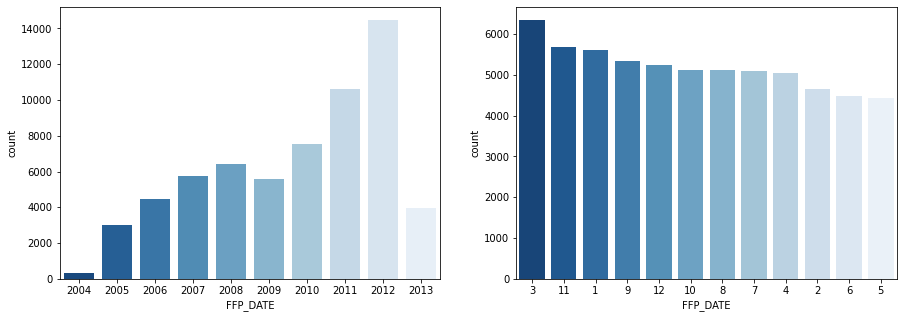

In [ ]:
ffp = df['FFP_DATE']

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=ffp.dt.year,  palette='Blues_r')

plt.subplot(1,2,2)
sns.countplot(x=ffp.dt.month, order=ffp.dt.month.value_counts().index,  palette='Blues_r');

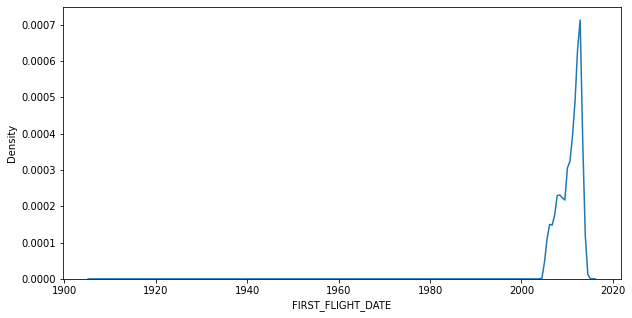

In [ ]:
# Melihat sebaran data pada FIRST_FLIGHT_DATE
plt.figure(figsize=(10,5))
sns.kdeplot(df['FIRST_FLIGHT_DATE']);

**Observation Results:**
- pada tahun 2009 dan 2013 terjadi penurunan jumlah customer yang bergabung dalam keanggotaan.
- customer paling banyak bergabung pada bulan Maret.
- Feature FIRST_FLIGHT_DATE memiliki outlier pada waktu sebelum 2004-11-01 dan setelah 2014-03-31.

#### **3.4.2. Univariate Analysis - Numeric**

##### **a. Individual Boxplot**

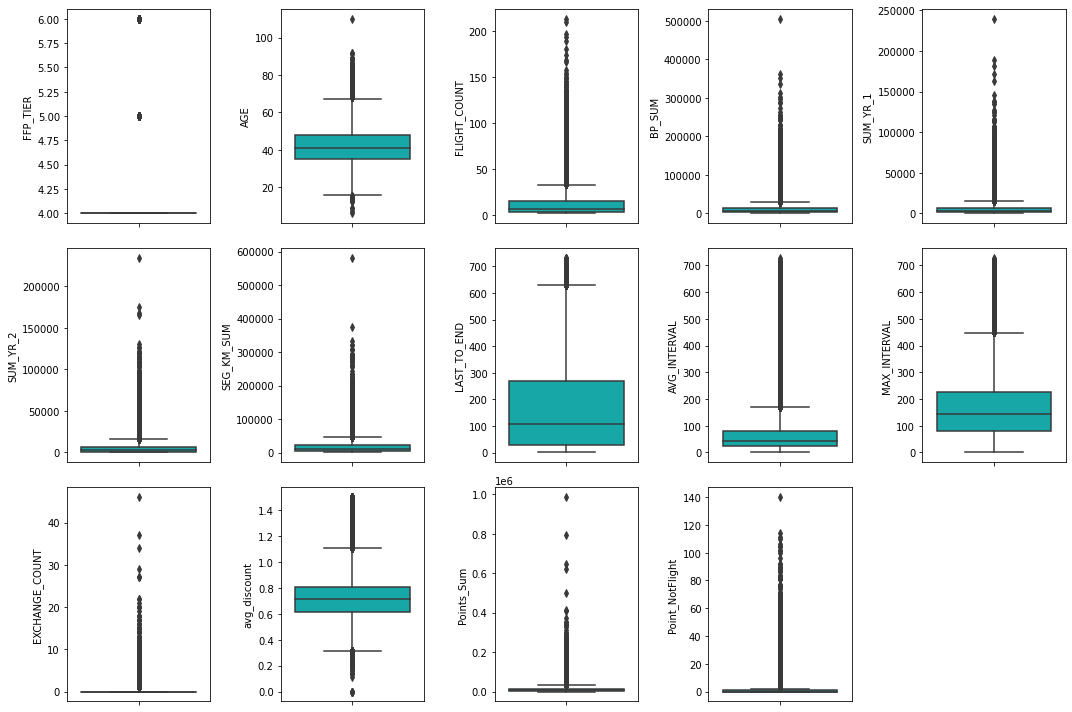

In [ ]:
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='c')
    plt.tight_layout()

**Observation Result:**
Seluruh features memiliki outlier kecuali FFP_TIER.

##### **b. Individual Distplot**

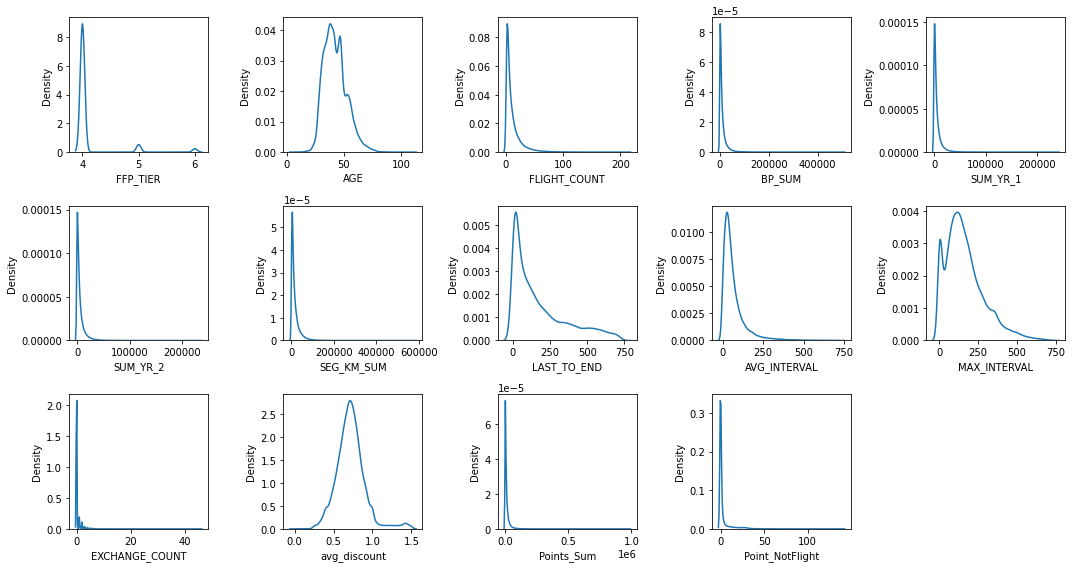

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0,len(nums)):
  plt.subplot(3,5,i+1)
  sns.kdeplot(df[nums[i]])
  plt.tight_layout()

**Observation Result:**
Kebanyakan feature memiliki distribusi data positively skewed.

### **3.5. Multivariate Analysis**

#### **Heatmap**

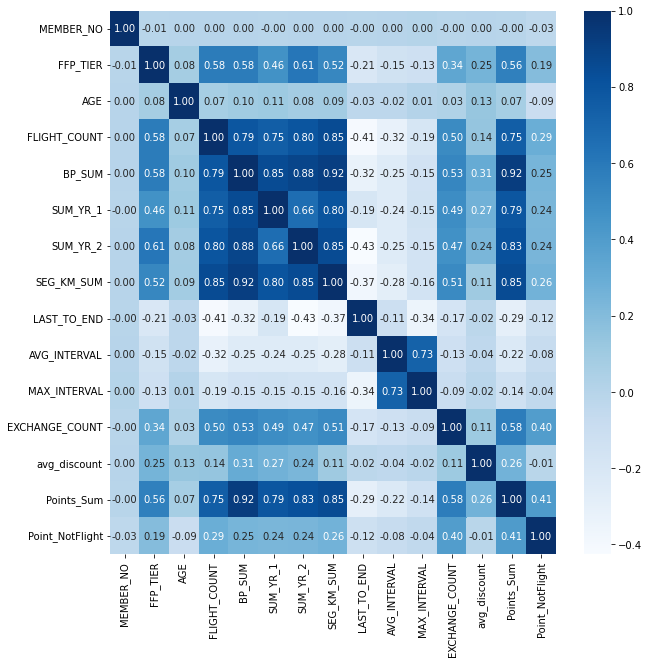

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

In [ ]:
cor_mat = df.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col]>0.7)]
to_drop

['BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'MAX_INTERVAL', 'Points_Sum']

Cukup banyak feature yang memiliki korelasi satu sama lain yaitu:

- **'BP_SUM'** dengan 'FLIGHT_COUNT', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'Points_Sum'
- **'SUM_YR_1'** dengan 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_2', 'SEG_KM_SUM', 'Points_Sum'
- **'SUM_YR_2'** dengan 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SEG_KM_SUM', 'Points_Sum'
- **'SEG_KM_SUM'** dengan 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'Points_Sum'
- **'MAX_INTERVAL'** dengan 'AVG_INTERVAL'
- **'Points_Sum'** dengan 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM'

Diantara feature di atas feature yang berkorelasi paling kuat satu sama lain adalah **BP_SUM** dengan **SEG_KM_SUM** dan **Points_Sum**. Karena BP_SUM dan Points_Sum kurang lebih nilainya sama, yaitu keduanya menunjukkan poin, korelasi dengan SEG_KM_SUM berarti bahwa pelanggan dapat memperoleh lebih banyak poin apabila memiliki total jarak tempuh yang lebih besar (terbang ke tempat yang jauh).

## **CHAPTER IV. PREPROCESSING**

### **4.1. Handle Missing Values**

#### **4.1.1. Null Value**

In [ ]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2178
WORK_PROVINCE        3134
WORK_COUNTRY           24
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              547
SUM_YR_2              137
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
df[['SUM_YR_1', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']].isna().any(axis=1).sum()/df.shape[0]*100

1.1440432515929717

In [9]:
# SUM_YR_1, SUM_YR_2, WORK_COUNTRY, GENDER null values hanya sekitar 1%, baris ini akan didrop
cols = ['SUM_YR_1','SUM_YR_2','WORK_COUNTRY','GENDER']
df.dropna(subset=cols, inplace=True)

In [10]:
# Untuk baris null pada kolom WORK_CITY dan WORK_PROVINCE akan diisi dengan nilai mode setiap kolom pada baris yang hilang.
cols = ['WORK_CITY', 'WORK_PROVINCE']
for col in cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
# Memeriksa apakah data sudah bersih dari null value
df.isnull().sum().sum()

0

#### **4.1.2. Error Value**

##### **a. FIRST_FLIGHT_DATE**

In [12]:
# Memeriksa kesalahan input waktu pada feature FIRST_FLIGHT_DATE
df[df['FIRST_FLIGHT_DATE']<'2004-11-01']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,41193,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35,2014-03-31,40,26851,5956.000000,22244.000000,52763,2014-03-14,18,18.051282,92,1,0.688062,33588,27
30099,1999,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37,2014-03-31,8,6366,5385.000000,1907.000000,9592,2013-11-19,134,75.000000,178,1,0.775909,26192,38


In [13]:
df[df['FIRST_FLIGHT_DATE']>'2014-03-31']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
3293,12746,2008-09-24,2015-03-09,Male,5,zhuhai,guangdong,CN,47,2014-03-31,25,41312,18347.000000,19595.000000,52083,2014-01-08,84,22.083333,192,1,0.807256,42312,2
3733,17746,2007-06-04,2015-02-15,Male,4,dalianshi,liaoningsheng,CN,41,2014-03-31,43,33326,14258.000000,22887.000000,63459,2014-03-27,5,17.261905,191,2,0.625447,37979,7
16393,56588,2007-04-01,2015-05-30,Male,4,guangzhou,guangdong,JP,43,2014-03-31,17,11376,4956.000000,7810.000000,17470,2014-02-17,44,32.312500,102,0,0.845973,11376,0
25240,62783,2006-03-08,2014-07-14,Male,4,haerbin,heilongjiang,CN,38,2014-03-31,11,9113,576.000000,5820.000000,18642,2013-09-15,199,38.700000,175,11,0.504935,647113,13
28231,45225,2011-01-15,2015-04-03,Female,4,zhengzhou,henan,CN,48,2014-03-31,8,5502,0.000000,7030.000000,14245,2014-03-24,8,41.571429,128,0,0.570465,5502,0
33198,9889,2006-11-10,2014-09-11,Male,4,tianjin,tianjin,CN,48,2014-03-31,2,6540,0.000000,5767.000000,4564,2014-02-09,52,94.000000,94,0,1.410000,6540,0


**Karena jumlahnya sedikit maka akan didrop.**

In [14]:
# Drop value error
df.drop(df[df['FIRST_FLIGHT_DATE']<'2004-11-01'].index, inplace=True)
df.drop(df[df['FIRST_FLIGHT_DATE']>'2014-03-31'].index, inplace=True)

##### **b. AVG_INTERVAL**

In [15]:
# Memeriksa feature AVG_INTERVAL dengan value 0 namun
# waktu terbang pertama dan terakhirnya tidak sama
df[df['AVG_INTERVAL']==0][df['FIRST_FLIGHT_DATE'] != df['LAST_FLIGHT_DATE']].shape[0]/df.shape[0]

# Karena persentase baris errornya sangat kecil maka akan didrop

0.002099985348939426

In [16]:
# Drop value error
df.drop(df[df['AVG_INTERVAL']==0][df['FIRST_FLIGHT_DATE'] != df['LAST_FLIGHT_DATE']].index, inplace=True)

##### **c. SUM_YR_1 dan SUM_YR_2**

In [17]:
# Memeriksa feature SUM_YR_1 dan SUM_YR_2 yang bernilai 0 padahal diskon yang diperoleh customer kurang dari 100%
# dan customer belum pernah menukar poin
df[((df['SUM_YR_1']==0)&(df['SUM_YR_2']==0)) & ((df['avg_discount']<1)&(df['EXCHANGE_COUNT']==0))].shape[0]/df.shape[0]

# Karena persentase baris errornya sangat kecil maka akan didrop

0.0037520391517128875

In [18]:
# Drop value error
df.drop(df[((df['SUM_YR_1']==0)&(df['SUM_YR_2']==0)) & (df['avg_discount']<1)].index, inplace=True)

##### **d. avg_discount**

In [19]:
# Filter avg_discount maksimal bernilai 1
df = df[df['avg_discount']<=1]

In [20]:
# Memeriksa apakah ada avg_discount bernilai 0
df[(df['avg_discount']==0)]

# Ternyata sudah tidak ada

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


### **4.2. Feature Engineering**

#### **4.2.1. Feature Extraction**

Membuat feature MEMBER_DURATION yang menunjukkan durasi dari customer bergabung dalam keanggotaan sampai saat data diperoleh, feature ini menunjukkan loyalitas customer.

In [21]:
df['MEMBER_DURATION'] = (df['LOAD_TIME'] - df['FFP_DATE']).astype('timedelta64[D]').astype(int)

#### **4.2.2. Feature Selection (LRFMC Model)**

Model yang paling banyak digunakan untuk mengidentifikasi nilai pelanggan adalah dengan mengevaluasi dan menganalisis melalui tiga indikator, sebagai berikut: 
- Interval Konsumsi Terbaru (*Recency*) 
- Frekuensi konsumsi (*Frekuensi*) 
- Konsumsi (*Monetary*)

Ini adalah model umum yang disebut model RFM. Dengan menganalisis tiga indikator konsumen individu, pelanggan kelompok konsumen dapat disegmentasikan untuk mengidentifikasi pelanggan bernilai tinggi. Dalam model RFM, jumlah konsumsi (*Monetary*) mewakili jumlah total pembelian produk perusahaan oleh pelanggan selama periode waktu tertentu. Karena tarif penerbangan dipengaruhi oleh berbagai faktor seperti jarak transportasi dan kelas kabin, penumpang yang berbeda dengan jumlah konsumsi yang sama memiliki nilai yang berbeda bagi maskapai (Tao, 2020). Misalnya, penumpang dengan posisi rendah pada rute panjang dan penumpang dengan posisi tinggi pada rute pendek , yang pertama mahal , tetapi yang kedua mungkin lebih berharga bagi Airlines. Oleh karena itu, indikator tunggal jumlah konsumsi tidak berlaku untuk skenario aplikasi spesifik dari analisis nilai pelanggan maskapai penerbangan. 

Sebagai pengganti jumlah konsumsi, dipilih dua indikator: akumulasi jarak tempuh pelanggan (*Mileage*) dan nilai rata-rata koefisien diskon yang sesuai dengan posisi pelanggan (*Coeff*). Selain itu, mengingat lamanya waktu keanggotaan anggota maskapai dapat mempengaruhi nilai pelanggan, panjang hubungan pelanggan (*Length*) ditambahkan ke model sebagai indikator lain untuk membedakan pelanggan. Lima indikator panjang hubungan pelanggan L, interval konsumsi R, frekuensi konsumsi F, jarak tempuh penerbangan M, dan koefisien diskon C digunakan sebagai indikator identifikasi pelanggan maskapai penerbangan. Berdasarkan simulasi, model yang disesuaikan untuk memenuhi kebutuhan khusus disebut model LRFMC.

- L (Length): **MEMBER_DURATION**, durasi (days) dari customer bergabung dalam keanggotaan sampai saat data diperoleh.
- R (Recency): **LAST_TO_END**, durasi (days) antara terakhir kali pelanggan melakukan penerbangan hingga saat data diperoleh.
- F (Frequency): **FLIGHT_COUNT**, jumlah total penerbangan yang telah dilakukan.
- M (Mileage): **SEG_KM_SUM**, total jarak (km) penerbangan yang telah dilakukan.
- C (Coef): **AVG_DISCOUNT**, diskon rata-rata yang diperoleh pelanggan. Umumnya, diskon yang lebih besar sesuai dengan kelas penerbangan yang lebih tinggi.

In [22]:
# Menyimpan data awal
df_ori = df.copy()

In [23]:
df['L'] = df['MEMBER_DURATION']
df['R'] = df['LAST_TO_END']
df['F'] = df['FLIGHT_COUNT']
df['M'] = df['SEG_KM_SUM']
df['C'] = df['avg_discount']

In [24]:
df_mod = df[['L','R','F','M','C',]]
df_mod.sample(3)

,L,R,F,M,C
32990,1044,488,7,9260,0.701933
47148,1944,562,3,3820,0.847120
45665,3376,490,3,5194,0.674249


### **4.3. Feature Transformation**

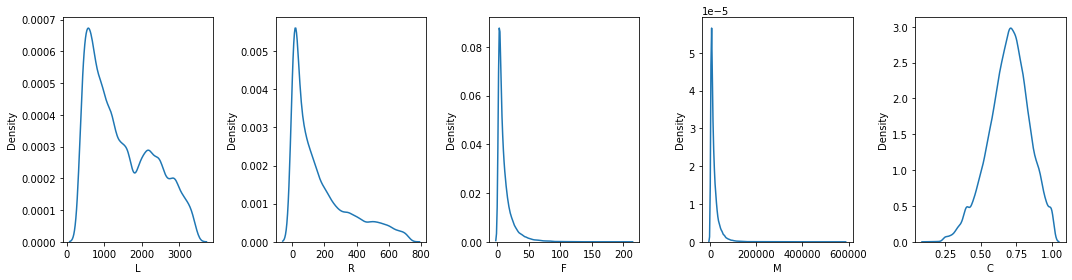

In [ ]:
# Melihat distribusi data
cols = ['L','R','F','M','C',]
plt.figure(figsize=(15,4))
for i in range(0,len(cols)):
  plt.subplot(1,5,i+1)
  sns.kdeplot(df_mod[cols[i]])
  plt.tight_layout()

Dalam clustering K-means, sangat diperlukan agar distribusi features mendekati distribusi normal, sehingga posisi centroid dari setiap cluster tidak akan bias. Namun, seperti yang dapat dilihat dari distribusi feature di atas, hanya C yang mendekati distribusi normal, dan feature lainnya positively skewed. Terutama feature F dan M, distribusinya sangat miring sehingga terdapat banyak outlier. Untuk menangani hal ini akan dilakukan transformasi boxcox.

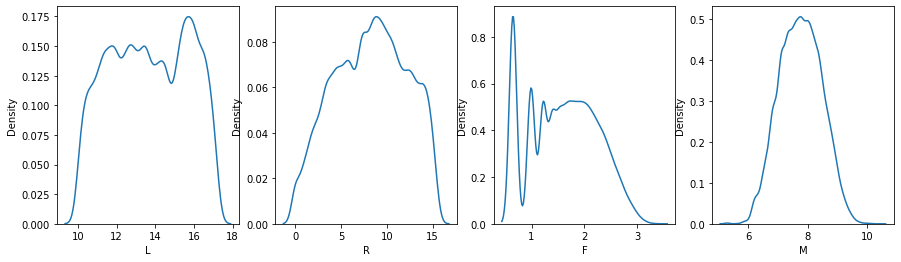

In [ ]:
# Melihat distribusi data apabila dilakukan transformasi bocxox
plt.figure(figsize=(15,4))
cols = ['L', 'R','F','M']
for i in range(0,len(cols)):
  plt.subplot(1,4,i+1)
  sns.kdeplot(st.boxcox(df_mod[cols[i]])[0])
  plt.xlabel(cols[i])

**Distribusi M sekarang sangat Gaussian, untuk L, R dan F distribusinya sudah lebih baik dari sebelumnya.**

In [25]:
# Menambahkan feature hasil transformasi boxcox
df_mod['BC_L'] = st.boxcox(df_mod['L'])[0]
df_mod['BC_R'] = st.boxcox(df_mod['R'])[0]
df_mod['BC_F'] = st.boxcox(df_mod['F'])[0]
df_mod['BC_M'] = st.boxcox(df_mod['M'])[0]

In [26]:
# Drop feature yang sudah digantikan
df_mod.drop(['L','R','F','M'], axis=1, inplace=True)

In [27]:
df_mod

,C,BC_L,BC_R,BC_F,BC_M
0,0.961639,16.317924,0.000000,3.354000,10.387880
4,0.970658,14.888757,1.947872,3.233605,10.006905
5,0.967692,15.630512,7.531153,3.031247,9.975696
6,0.965347,16.615657,0.000000,3.070342,9.959728
7,0.962070,14.127559,1.249933,2.931300,9.960131
...,...,...,...,...,...
62973,0.350000,10.019389,12.458494,0.649338,5.852842
62974,0.710000,17.005478,7.861370,0.649338,5.283372
62975,0.670000,15.156733,8.755290,0.649338,5.283372
62976,0.225000,13.914956,5.750650,0.649338,6.110249


### **4.4. Standardization**

Sebelum menggunakan algoritma, features akan dilakukan standardisasi terlebih dahulu. Bila data tidak distandardisasi, maka dimensi dengan skala data besar akan menjadi dominan. Standardisasi dilakukan dengan menggunakan StandardScaler()

In [28]:
# Menginisiasi StandarScaler
ss = StandardScaler()

# Fit & transform terhadap df_mod
ss.fit(df_mod)
df_mod[df_mod.columns] = ss.transform(df_mod)

In [29]:
df_mod.describe()

,C,BC_L,BC_R,BC_F,BC_M
count,58184.000000,58184.000000,58184.000000,58184.000000,58184.000000
mean,0.000000,0.000000,0.000000,-0.000000,-0.000000
std,1.000009,1.000009,1.000009,1.000009,1.000009
min,-3.924709,-1.829299,-2.081969,-1.506400,-3.513887
25%,-0.627944,-0.863060,-0.790479,-0.967378,-0.736881
50%,0.051563,-0.021564,0.048743,0.033163,0.001751
75%,0.685132,0.906020,0.788798,0.805086,0.729235
max,2.126691,1.758186,1.847101,2.757125,3.735537


## **CHAPTER V. MODELING**

### **5.1. Menemukan Jumlah Cluster Optimal**

In [ ]:
inertia = [] # Total jarak setiap titik ke pusatnya

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_mod)
  inertia.append(kmeans.inertia_)

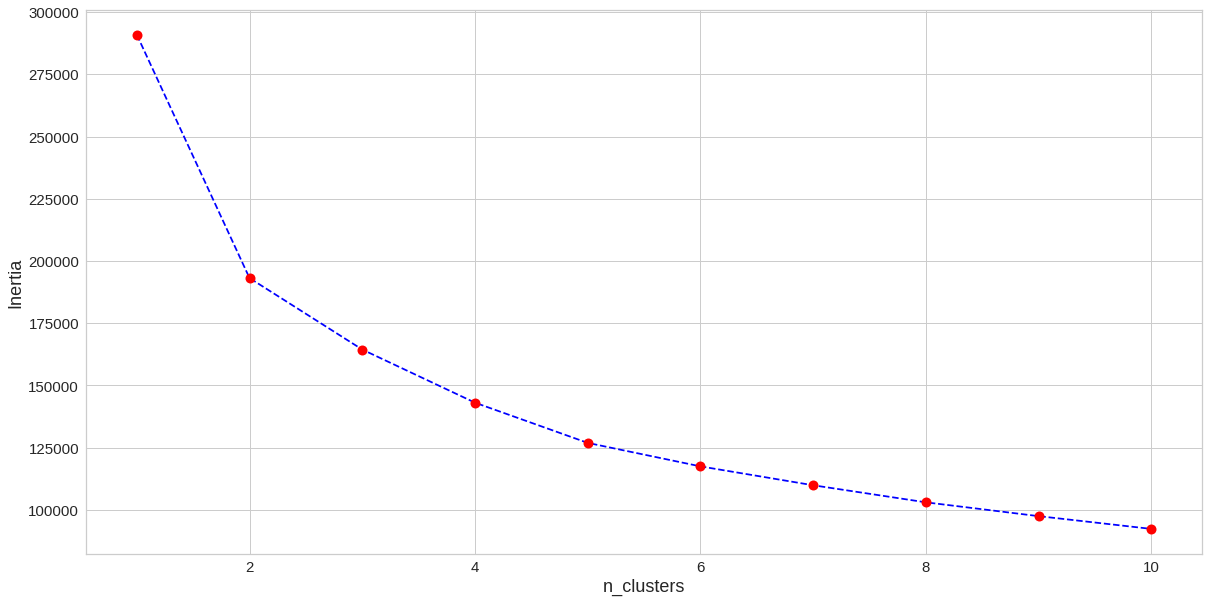

In [ ]:
# Import elbow visualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Plot inertia
plt.figure(figsize=(20, 10))

plt.plot(range(1,11), inertia, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('n_clusters', fontsize=18)
plt.ylabel('Inertia', fontsize=18);

**Observation Result:**
n_cluster optimal tampaknya 2 karena penambahan cluster berikutnya tampaknya tidak terlalu signifikan terhadap penurunan inertia, agar lebih pasti akan dihitung berapa persentase penurunan inertia untuk setiap penambahan cluster.

In [ ]:
# Melihat persentase penurunan inertia untuk setiap n_clusters
iner = pd.Series(inertia)
(iner - iner.shift(-1))/iner*100

0   33.608658
1   14.861615
2   12.981834
3   11.289622
4    7.435465
5    6.457502
6    6.241772
7    5.385919
8    5.257133
9         NaN
dtype: float64

**Observation Result:**
ternyata penurunannya memang tidak terlalu signifikan apabila clusternya lebih dari 2 sehingga n_cluster optimalnya adalah 2, untuk mendukung pengamatan ini akan dilakukan evaluasi menggunakan *Silhouette Score*.

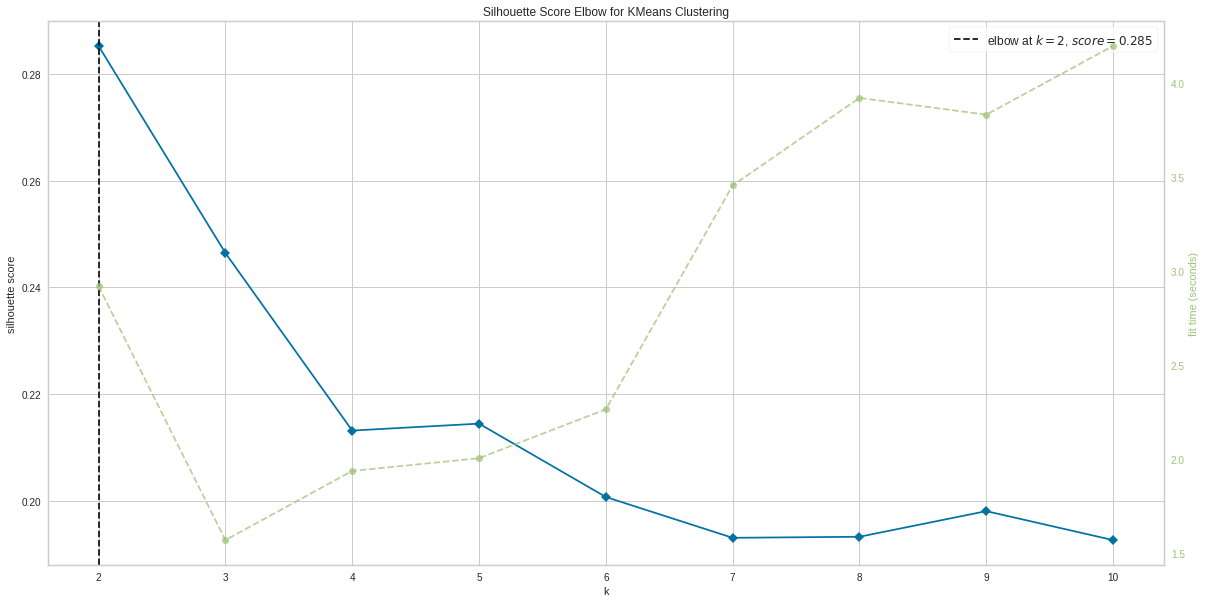

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Menentukan n_cluster optimal dengan silhouette score
plt.figure(figsize=(20,10))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)

visualizer.fit(df_mod)
visualizer.show()  

**Observation Result:**
Skor tertinggi dicapai pada n_cluster 2 dengan silhouette score 0.285, nilai ini terbilang kecil yang menunjukkan bahwa cluster bercampur dan pemisahannya tidak begitu jelas. n_cluster = 2 akan digunakan dan selanjutnya akan dilakukan analisa terhadap karakteristik masing-masing cluster.  Agar lebih mudah untuk memvisualisasikan hasil clustering akan dilakukan reduksi dimensi data menjadi 2 dimensi menggunakan PCA.

### **5.2. Visualisasi Cluster**

In [ ]:
# Melakukan clustering dengan n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_mod)
clusters = kmeans.labels_

# Melakukan reduksi dimensi dengan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_mod)
pcs = pca.transform(df_mod)

df_pca = pd.DataFrame(data = pcs, columns = ['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,5.329100,-1.301049
1,4.520346,-1.183825
2,3.682691,-1.618956
3,4.731479,-1.475391
4,4.197862,-0.946354


In [ ]:
# Menambahkan feature clusters hasil prediksi pada dataframe pca
df_pca['Clusters'] = clusters
df_pca.sample(3)

,PC1,PC2,Clusters
56324,-2.839585,1.170707,0
19244,0.522566,0.018952,1
21962,0.597458,-0.762428,1


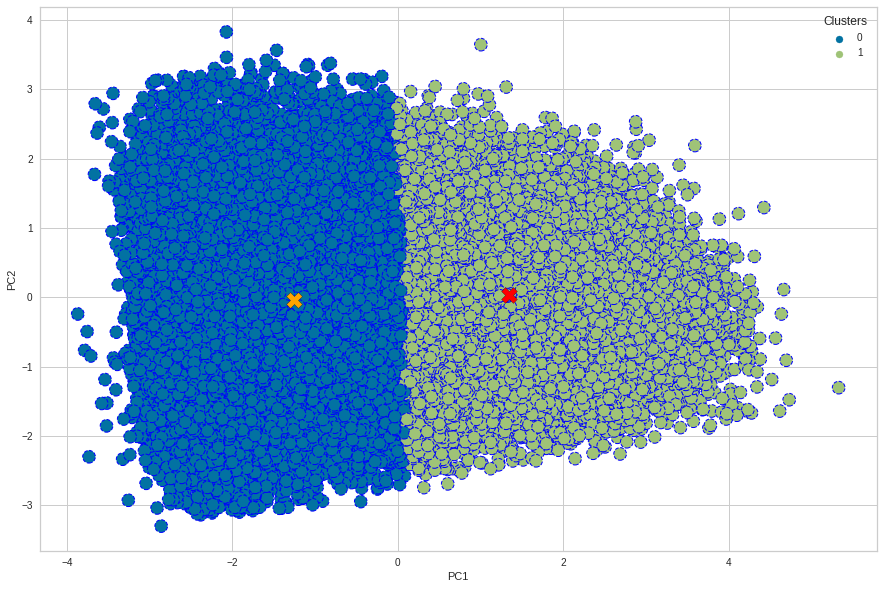

In [ ]:
plt.subplots(figsize=(15,10))

# Menampilkan centroid masing-masing cluster
cl0 = df_pca[df_pca['Clusters']==0]
cl1 = df_pca[df_pca['Clusters']==1]
plt.scatter(cl0['PC1'].mean(), cl0['PC2'].mean(), marker='X', c='orange', edgecolor='k',s=250,zorder=10)
plt.scatter(cl1['PC1'].mean(), cl1['PC2'].mean(), marker='X', c='red', edgecolor='k',s=250,zorder=10)

# Melihat visualisasi cluster
sns.scatterplot(x='PC1', y='PC2',
                hue='Clusters',
                edgecolor='blue',
                linestyle='--',
                data=df_pca,
                s=160
                );

**Observation Result:** seperti yang telah disebutkan sebelumnya bahwa cluster bercampur dan pemisahannya tidak begitu jelas.

### **5.3. Interpretasi Cluster**

Idealnya, model segmentasi yang baik akan memiliki nilai LRFMC yang unik untuk setiap cluster. Selanjutnya akan dilihat nilai LRFMC untuk masing-masing cluster menggunakan snake plot kemudian dilihat juga nilai statistik masing-masing cluster.

In [30]:
df_labels = df_mod.copy()

In [31]:
# Melakukan clustering
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(df_labels)
# Memberikan label
df_labels['clusters'] = kmeans.labels_
df_labels = df_labels.groupby(['clusters']).agg(num_members=('clusters','size'),
                                                median_L=('BC_L','median'),
                                                median_R=('BC_R','median'),
                                                median_F=('BC_F','median'),
                                                median_M=('BC_M','median'),
                                                median_C=('C','median')).reset_index()
df_labels = pd.melt(df_labels.reset_index(), 
                    id_vars=['clusters'],
                    value_vars=['median_L', 'median_R','median_F','median_M', 'median_C'], 
                    var_name='Metric', 
                    value_name='Value')
df_labels

,clusters,Metric,Value
0,0,median_L,-0.299340
1,1,median_L,0.321683
2,0,median_R,0.686775
3,1,median_R,-0.684568
4,0,median_F,-0.967378
5,1,median_F,0.805086
6,0,median_M,-0.697416
7,1,median_M,0.740421
8,0,median_C,-0.044571
9,1,median_C,0.125749


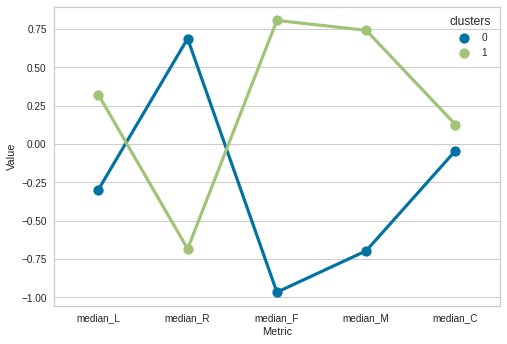

In [ ]:
# Menampilkan snake plot
plt.figure()
plt.xlabel('Metric')
plt.ylabel('Value')
sns.pointplot(data=df_labels, x='Metric', y='Value', hue='clusters');

**Obsertaviton Results:**
Pada plot di atas, kita dapat melihat bahwa kedua cluster memiliki nilai LRFMC yang berbeda. Segmentasi pelanggan untuk metrik LRFMC menunjukkan **cluster 1 merupakan customer yang lebih bernilai** dibandingkan dengan cluster 0 untuk perusahaan karena dilihat dari nilai mediannya karakteristik cluster ini adalah sebagai berikut:

- Length atau panjang hubungan customer dengan perusahaan nilainya lebih tinggi, hal ini menunjukkan customer sangat loyal kepada perusahaan.
- Recency atau kebaruan customer memiliki nilai yang lebih rendah, hal ini menunjukkan customer masih menggunakan jasa perusahaan dalam waktu dekat.
- Frequency tinggi, perbedaan nilai frequency antar cluster cukup besar hal ini menunjukkan bahwa customer pada cluster 0 jauh lebih sering terbang.
- Mileage tinggi, seperti yang ditunjukkan pada heatmap bahwa 'SEG_KM_SUM' (M) dengan 'FLIGHT_COUNT' (F) memiliki korelasi yang tinggi maka hasil ini sudah bukan penemuan baru lagi ketika frequency cluster 1 lebih tinggi maka mileagenya juga lebih tinggi.
-  Coeffisien discount lebih tinggi, hal ini menandakan customer lebih berkualitas karena lebih sering menggunakan discount yang diberikan perusahaan.

**Melihat Statistik untuk masing-masing cluster.**

In [34]:
# Menempelkan label cluster yang dihasilkan ke dataframe asal
df_ori['Clusters'] = kmeans.labels_
df_ori.sample(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,Clusters
60022,15883,2012-12-16,2013-04-03,Male,4,shanghai,shanghai,CN,31,2014-03-31,2,1180,0.000000,1236.000000,2556,2013-08-15,230,134.000000,134,0,0.490063,1180,0,470,0
8995,57976,2009-08-19,2009-08-20,Male,4,beijing,beijing,CN,38,2014-03-31,22,20939,14970.000000,6494.000000,32874,2013-06-19,287,17.952381,81,0,0.718747,20939,0,1685,1
34365,59426,2012-05-13,2013-06-05,Male,4,shanghai,shanghai,CN,39,2014-03-31,7,5873,0.000000,2747.000000,7244,2013-09-01,213,14.666667,40,0,0.841777,5873,0,687,0


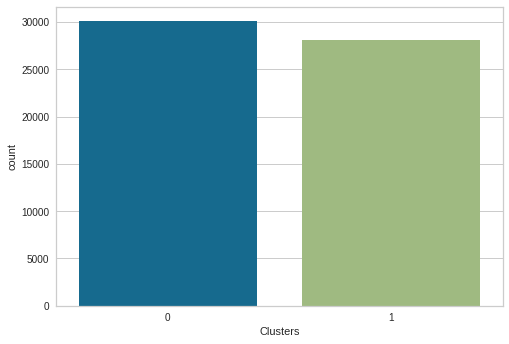

In [ ]:
sns.countplot(df_ori['Clusters']);

**Cluster 1 memiliki jumlah member yang lebih sedikit dibandingkan dengan cluster 0.**

In [35]:
# Melihat jumlah gender berdasarkan cluster
df_ori.groupby(['Clusters','GENDER']).MEMBER_NO.count()

Clusters  GENDER
0         Female     8343
          Male      21755
1         Female     5542
          Male      22544
Name: MEMBER_NO, dtype: int64

In [37]:
# Menghitung persentase gender laki-laki di cluster 1
22544/(5542+22544)*100

80.26774905646941

Sebanyak 80.26% customer cluster 1 adalah laki-laki.

In [ ]:
print('Desc. Statistics Cluster 0')
print(df_ori[df_ori['Clusters']==0].median())
print('--'*18)
print('Desc. Statistics Cluster 1')
print(df_ori[df_ori['Clusters']==1].median())

Desc. Statistics Cluster 0
MEMBER_NO         31560.500000
FFP_TIER              4.000000
AGE                  40.000000
FLIGHT_COUNT          3.000000
BP_SUM             2650.000000
SUM_YR_1           1458.000000
SUM_YR_2           1015.000000
SEG_KM_SUM         5047.000000
LAST_TO_END         234.000000
AVG_INTERVAL         64.000000
MAX_INTERVAL        139.000000
EXCHANGE_COUNT        0.000000
avg_discount          0.690000
Points_Sum         2921.000000
Point_NotFlight       0.000000
MEMBER_DURATION    1053.000000
Clusters              0.000000
dtype: float64
------------------------------------
Desc. Statistics Cluster 1
MEMBER_NO         31453.000000
FFP_TIER              4.000000
AGE                  42.000000
FLIGHT_COUNT         15.000000
BP_SUM            12479.500000
SUM_YR_1           5918.500000
SUM_YR_2           6708.500000
SEG_KM_SUM        21433.500000
LAST_TO_END          35.000000
AVG_INTERVAL         36.846154
MAX_INTERVAL        148.000000
EXCHANGE_COUNT        0.00

**Recommendation:**

1. Berdasarkan hasil segmentasi, perusahaan hanya memiliki 2 karakteristik pelanggan. Sebelumnya dalam kumpulan data asli, terdapat feature FFP_TIER yang menunjukkan tingkat keanggotaan yang berisi 3 tingkat, nanti akan dilihat visualisasi dari 3 tingkat ini apakah efektif untuk memisahkan karakteristik pelanggan atau lebih baik digantikan oleh hasil segmentasi yang baru.

2. Dilihat dari feature EXCHANGE_COUNT, kebanyakan customer dari kedua cluster belum pernah menukarkan poinnya, untuk itu perusahaan dapat menggalakan campaign khususnya kepada cluster 1 mengenai penggunaan poin yang dimiliki customer menjadi potongan harga atau pelayanan ekstra, namun penukaran poin ini diberi batasan waktu dimana poin-poin tersebut akan kedaluwarsa setelah periode tertentu untuk mendorong konsumsi pelanggan sebanyak mungkin. Perusahaan juga dapat memberikan reminder dan promosi kepada pelanggan yang poinnya mendekati ambang batas sebelum poinnya kedaluwarsa untuk menghindari ketidakpuasan.

3. Cluster 1 adalah tipe pelanggan yang paling ideal, mereka memberikan kontribusi paling besar kepada maskapai. Maskapai dapat berfokus kepada customer ini dan perlu mempertahankan loyalitas mereka seperti memberikan layanan ekstra selama penerbangan atau diskon ekstra untuk kursi kelas atas.

4. Karena jumlah customer 0 juga cukup banyak, maskapai penerbangan dapat meningkatkan interaksi dengan pelanggan cluster 0 dan dengan mengambil strategi pemasaran tertentu untuk meningkatkan fequency terbang pelanggan mengingat nilai median dari jumlah terbang pelanggan ini hanyalah 3 kali.

5. Seperti yang telah diketahui sebelumnya, 80% customer dari cluster 1 adalah laki-laki, asumsinya adalah banyak dari mereka yang melakukan perjalanan bisnis karena 56% pekerja di China adalah laki-laki (akan lebih baik apabila didukung dengan data tujuan keberangkatan apakah liburan atau perjalanan bisnis, untuk itu rekomendasi yang dapat diberikan adalah maskapai dapat menawarkan package khusus perjalanan bisnis untuk perusahaan-perusahaan.

**Melihat visualisasi cluster berdasarkan FFP_TIER.**

In [ ]:
df_tier = df_pca.copy()
df_tier['Clusters'] = df_ori.reset_index()['FFP_TIER']
df_tier.sample(3)

,PC1,PC2,Clusters
576,3.737369,-0.328838,6
8608,2.218749,-0.125855,4
7570,2.031142,0.290674,6


In [ ]:
df_tier.to_csv('df_tier.csv')
!cp df_tier.csv "drive/My Drive/"

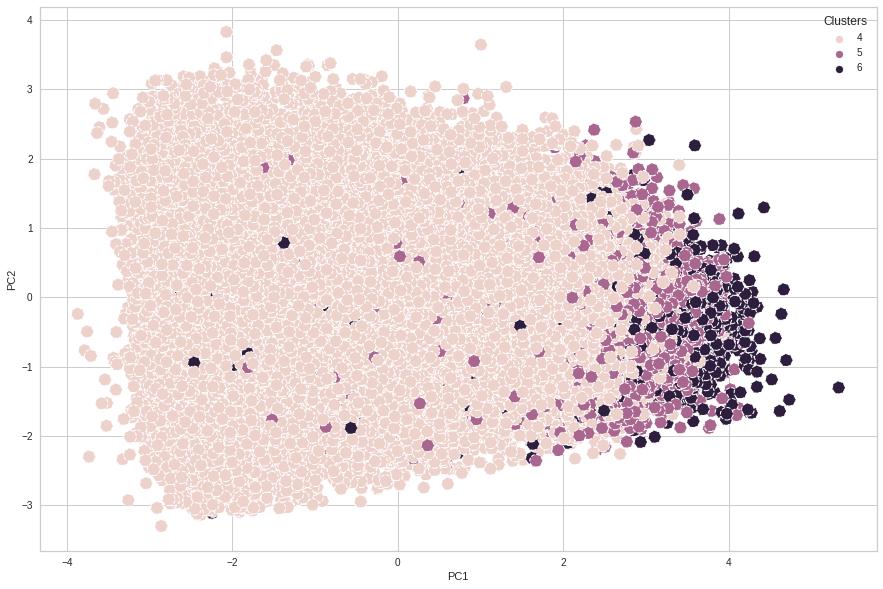

In [ ]:
plt.figure(figsize=(15,10))

sns.scatterplot(
    x='PC1', y='PC2',
    hue='Clusters',
    linestyle='--',
    data=df_tier,
    s=160,
);

**Conclusion:**
Terlihat bahwa cluster berbasis FFP_TIER masih belum ideal dalam memisahkan anggota cluster sehingga hasil clustering menggunakan KMeans dapat menggantikannya.